In [1]:
import pandas as pd
from src import train


file_path = "./data/processed/Tg.csv"
prop = "tg"
augmentation = True
outdir = "outputs/"    # 保存場所
data_name = "Tg_1200"  # 保存するときの名前

bayopt_bounds = {
    "lstm_units": [3, 7],
    "dense_units": [3, 7],
    "embedding_dim": [3, 7],
    "batch_size": [3, 7],
    "learning_rate": [1e-4, 1e-1],
}

data = pd.read_csv(file_path)
data = data[["smiles", prop]]
data = data.iloc[:1200, :]
data

,smiles,tg
0,*C*,-120.0
1,*CC*,-120.0
2,*CC(*)C,-3.0
3,*CC(*)CC,-24.1
4,*CC(*)CCC,-37.0
...,...,...
1195,*Oc1cc(CCCC)cc(OC(=O)c2cccc(C(*)=O)c2)c1,97.5
1196,*CCCCCCCCCCOC(=O)c1ccc2cc(C(=O)O*)ccc2c1,50.5
1197,*CCC(C)CCC(=O)O*,-53.0
1198,*OC(C)CCCC(C)C(*)=O,-33.0


Seed set to 42


precision is 32
***Sampling and splitting of the dataset.***

Train/valid/test splits:0.80/0.10/0.10


Setup Polymer Tokens.
***Data augmentation is True***

Enumerated SMILES:
Number of tokens only present in a training set:36

Number of tokens only present in a validation set33
Is the validation set a subset of the training set:True
What are the tokens by which they differ:set()

Number of tokens only present in a test set:31
Is the test set a subset of the training set:True
What are the tokens by which they differ:set()
Is the test set a subset of the validation set:False
What are the tokens by which they differ:{'I'}

Full vocabulary: ['O', 'S', '%10', 'F', '\\', '#', '%11', '[N-]', '3', '*', '[O-]', 'P', 'C', ' ', 'Cl', 's', '(', 'N', 'o', '4', '=', 'n', '6', '-', '2', '1', '8', '5', 'c', '[N+]', 'I', '/', '9', 'Br', ')', '7']
Of size: 36

Maximum length of tokenized SMILES: 199 tokens (termination spaces included)



[I 2024-03-15 23:42:41,151] A new study created in memory with name: no-name-413f4d25-13cc-47d0-9c46-5e48af746493
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | train_metrics | MetricCollection | 0     
1 | valid_metrics | MetricCollection | 0     
2 | model         | LSTMAttention    | 27.8 K
---------------------------------------------------
27.8 K    Trainable params
0         Non-trainable params
27.8 K    Total params
0.111     Total estimated model params size (MB)
Epoch 10: 100%|██████████| 689/689 [00:08<00:00, 82.07it/s, loss=1575.650, val_loss=1699.562]
`Trainer.fit` stopped: `max_epochs=10` reached.
[I 2024-03-15 23:44:12,553] Trial 0 finished with value: 1699.5616455078125 and parameters: {'n_lstm_units': 4, 'n_dense_units': 7,

Best Params
LSTM units       | 128
Dense units      | 64
Embedding units  | 16
Batch size       | 8
learning rate     | 0.0008569331925053991

***Training of the best model.***



Epoch 24: 100%|██████████| 2759/2759 [00:18<00:00, 150.93it/s, loss=225.427, val_loss=1305.087]


Training Finished!!!
Best val_loss @ Epoch #13

***Predictions from the best model.***

For the training set:
MAE: 10.4163 RMSE: 14.3993 R^2: 0.9804
For the validation set:
MAE: 23.6553 RMSE: 33.3880 R^2: 0.8979
For the test set:
MAE: 20.4527 RMSE: 36.5585 R^2: 0.8871


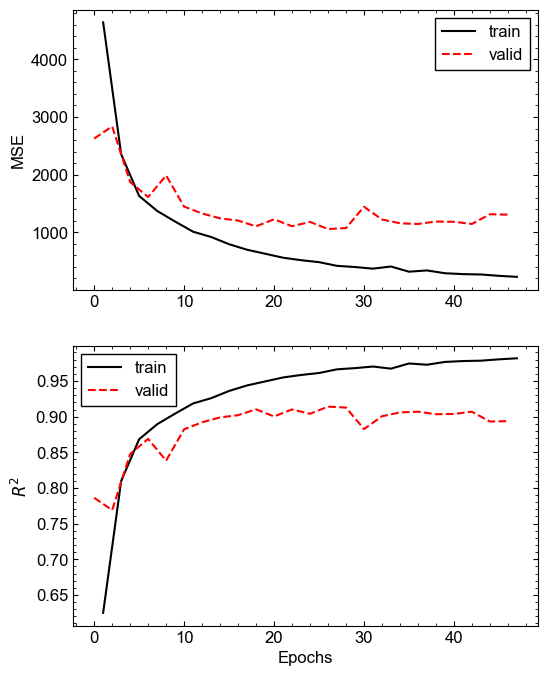

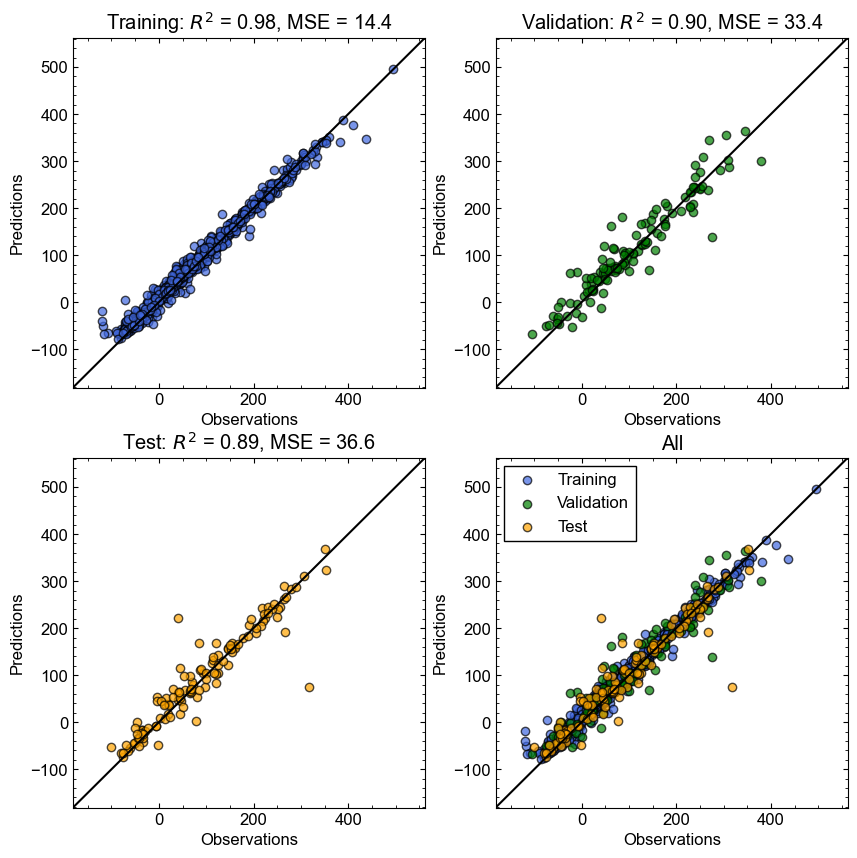

In [2]:
train.main(
    data=data,
    data_name=data_name,
    bayopt_bounds=bayopt_bounds,
    augmentation=augmentation,
    outdir="./outputs/",
    bayopt_n_epochs=10,
    bayopt_n_iters=30,
    n_epochs=100,
    tf16=False,
    loss_func="MSE",  # MSE or MAE
    seed=42
)